## Erste Analysen des Datensets
Erste Visualisierungen von Abhängigkeiten bzw. Korrelationen verschiedener Parameter.

### Datenset laden & Head zeigen
Lädt Daten und zeigt Auszug der ersten paar Reihen.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import package.importer as im
import package.consts as c
import package.charts as charts

# set size of seaborn plots
charts.set_plot_size(sns)

df = im.get_dataset('package/dataset.csv')
df.head()

,id,source,verification_status,title,neubau_umbau,comment,nom_address,nom_zip,nom_location_name,nom_country,...,bool_has_attachments,dyn_kreis_type,nom_construction_start,nom_main_allocation_time,nom_construction_end,nom_bki_kostenstand,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
5,1637,wbw_050_1986_4,VERIFIED_OK,"Loogarten, Zürich_BKP1",NEUBAU,Index und Anlagekosten i.O. BKP 2stellig nich...,Salzweg 1,8048.0,Zürich,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,9265295.0,5793.0,13758.0,NaN
6,995,wbw_009_1983_6,VERIFIED_OK,Wohnsiedlung am Aabach in Mönchaltorf,NEUBAU,Alle Werte x 15 (Anzahl Häuser) genommen Nutz...,Seestrasse 20 - 48,8617.0,Mönchaltorf,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,4069500.0,5067.0,9108.0,NaN
8,1787,wbw_002_1982_12,VERIFIED_OK,Reuss-Siedlung in Unterwindisch,NEUBAU,"Nutzung 2 überprüfen, die offene Einstellhall...","Ländestrasse 13, 15",5210.0,Unterwindisch,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,1875000.0,2198.0,3290.0,NaN
9,2468,"wbw_020_1984_1,2",VERIFIED_OK,Regionalspital Sitten,NEUBAU,Kennwerte bereinigt BKP5 geschätzt!,Avenue du Grand Champsec 80,1951.0,Sitten,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,83902401.0,21600.0,155000.0,NaN
11,1775,wbw_004_1982_12,VERIFIED_OK,Genossenschaftliche Wohnbauten in Zürich,NEUBAU,NaN,Gutstrasse 206 - 228,8003.0,Zürich,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,16984000.0,16360.0,7057.0,NaN


### Prüfung der Daten
Zeigt Informationen zum Datenset an.<br>
z.B. Anzahl fehlender Daten. (Gefiltert auf Relevanz)


In [2]:
filtered_df = im.select_relevant_features(df)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 5 to 3342
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nom_usage_main          921 non-null    object 
 1   usage_cluster           921 non-null    object 
 2   nom_facade              820 non-null    object 
 3   area_total_floor_416    941 non-null    float64
 4   area_net_floor_416      311 non-null    float64
 5   area_main_usage         447 non-null    float64
 6   volume_total_416        669 non-null    float64
 7   volume_total_116        475 non-null    float64
 8   num_buildings           952 non-null    int64  
 9   num_floors_overground   893 non-null    float64
 10  num_floors_underground  952 non-null    float64
 11  total_expenses          891 non-null    float64
 12  cost_ref_gf             861 non-null    float64
 13  cost_ref_gfs            744 non-null    float64
dtypes: float64(10), int64(1), object(3)
memor

In [3]:
df[c.FIELD_USAGE_CLUSTER].value_counts()

WOHNEN           300
SCHULEN          194
HALLEN            99
BUERO             97
BEHERBERGUNG      65
BETRIEB           65
GESUNDHEIT        32
KULTUS_KULTUR     27
ANDERES           15
OFFENE_BAUTEN      9
TECHNIK            9
IRRELEVANT         8
AUSSENANLAGEN      1
Name: usage_cluster, dtype: int64

In [4]:
filtered_df.describe()

,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gf,cost_ref_gfs
count,941.000000,311.000000,447.000000,669.000000,475.000000,952.000000,893.000000,952.000000,8.910000e+02,861.000000,7.440000e+02
mean,6490.333688,4899.826367,3414.008949,23990.756353,28468.892632,1.627101,3.421221,0.912710,1.831384e+07,6462.505226,1.181949e+04
std,8702.532298,6705.418398,4470.124217,32883.672239,38813.180364,1.873110,2.090162,0.719019,2.637489e+07,8513.764395,5.407508e+04
min,13.000000,98.000000,75.000000,167.000000,356.000000,1.000000,0.000000,0.000000,3.289180e+05,13.000000,1.190000e+02
25%,1433.000000,1102.000000,724.500000,4540.000000,6437.000000,1.000000,2.000000,0.500000,4.397345e+06,1494.000000,2.211000e+03
50%,3432.000000,2216.000000,1699.000000,12600.000000,16752.000000,1.000000,3.000000,1.000000,1.025457e+07,3643.000000,5.400000e+03
75%,7772.000000,5882.500000,4125.500000,29393.000000,32965.000000,1.000000,4.000000,1.000000,2.090200e+07,7772.000000,1.040725e+04
max,75328.000000,50240.000000,29437.000000,272000.000000,315370.000000,28.000000,19.000000,5.000000,3.400000e+08,75328.000000,1.070000e+06


<br>

---

<br>

## Korrelationen

### Correlation Heatmap
Zeigt Korrelationen zwischen unterschiedlichen Werten auf. (Big Picture)

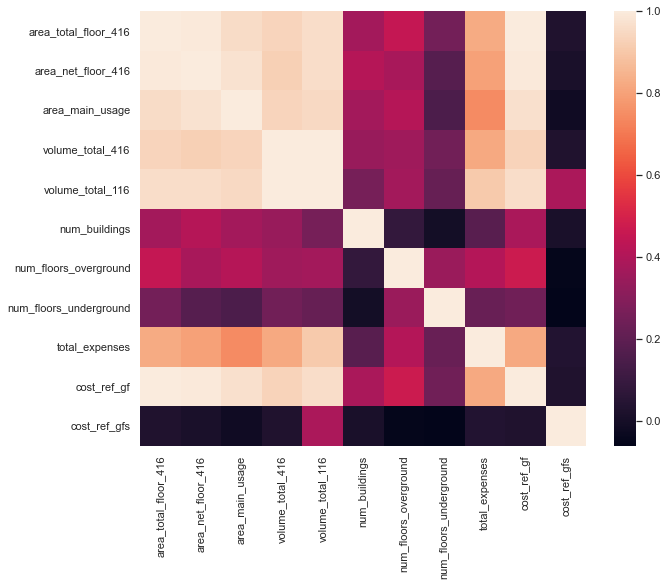

In [5]:
sns.heatmap(filtered_df.corr());

<br>

---

<br>

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.
<br>Optional: Anzahl Stockwerke

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF'>

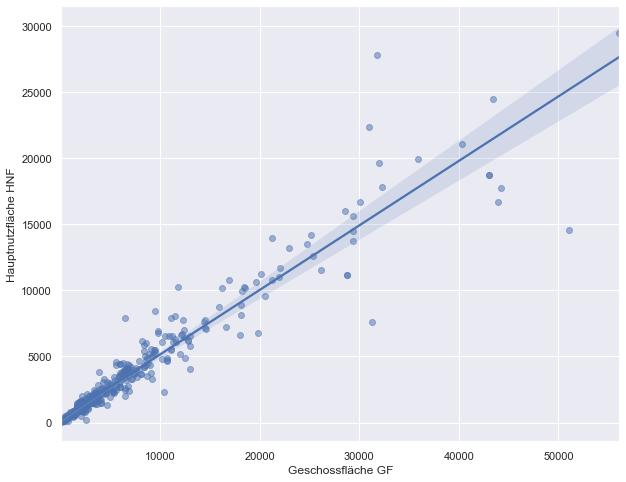

In [6]:
charts.regplot_gf_hnf(df)

<br>

---

<br>

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.<br>
Zusätzliche Kategorisierung nach **Hauptnutzung**.<br>
<br>
Auffällige Ausreisser bei "Typ" Technik (deshalb entfernt von Grafik).

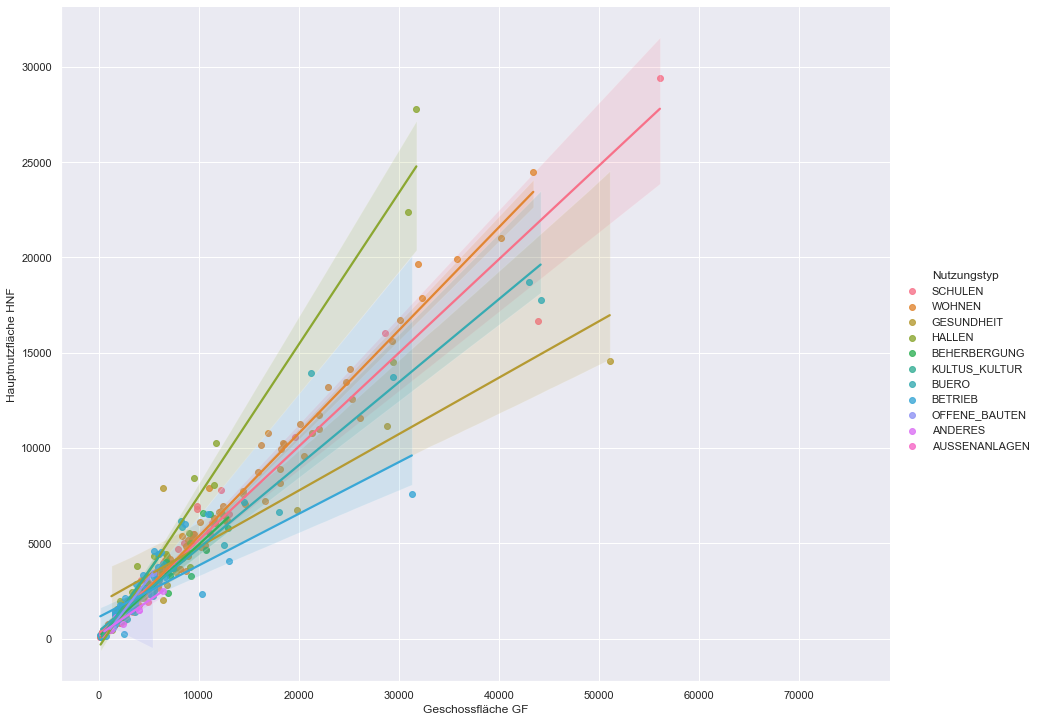

In [7]:
filtered_df = df[(df[c.FIELD_USAGE_CLUSTER] != 'IRRELEVANT') & (df[c.FIELD_USAGE_CLUSTER] != 'TECHNIK')]

gf = sns.lmplot(
    data=filtered_df,
    x=c.FIELD_AREA_TOTAL_FLOOR_416, y=c.FIELD_AREA_MAIN_USAGE,
    hue=c.FIELD_USAGE_CLUSTER,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT/charts.CHART_WIDTH
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')
gf.legend.set_title('Nutzungstyp')

### Geschossfläche und Stockwerke
Zeigt **Geschossfläche** in relation zur Anzahl **Stockwerke**.

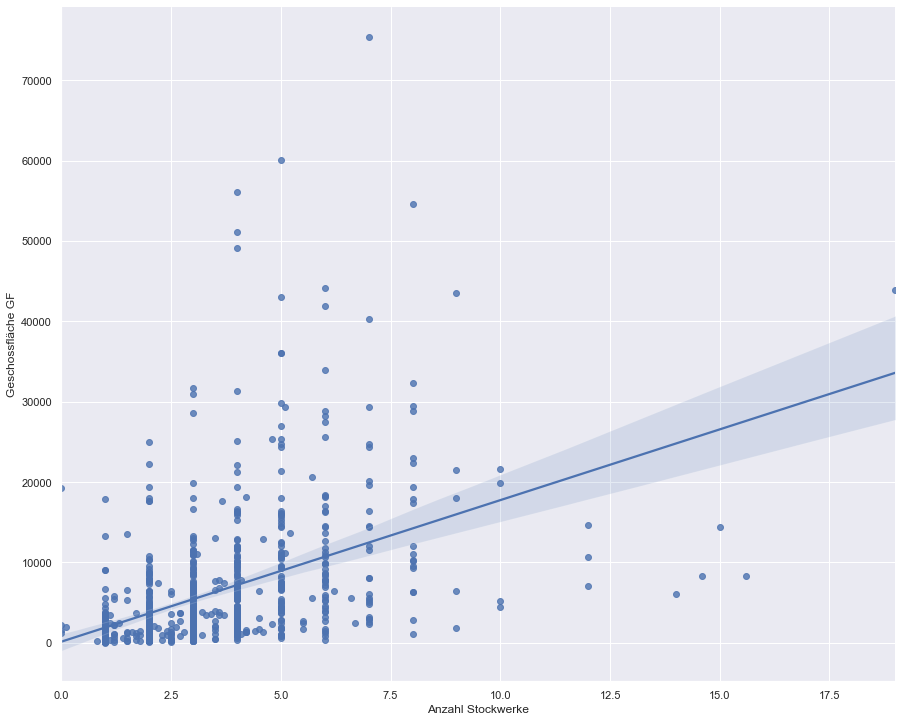

In [8]:
gf = sns.lmplot(
    data=df,
    x=c.FIELD_NUM_FLOORS_OVERGROUND, y=c.FIELD_AREA_TOTAL_FLOOR_416,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT/charts.CHART_WIDTH
    # hue=im.FIELD_USAGE_CLUSTER
)

gf.set(xlabel='Anzahl Stockwerke', ylabel='Geschossfläche GF')

<br>

---

<br>

## Verteilungen
Zeigt Verteilungen unterschiedlicher Features.

### Hauptnutzfläche
Zeigt die Verteilung der Grösse **Hauptnutzflächen**<br>
Aufteilung nach Cluster möglich.
<br>

[Text(0.5, 0, 'Hauptnutzfläche HNF'), Text(0, 0.5, 'Vorkommen')]

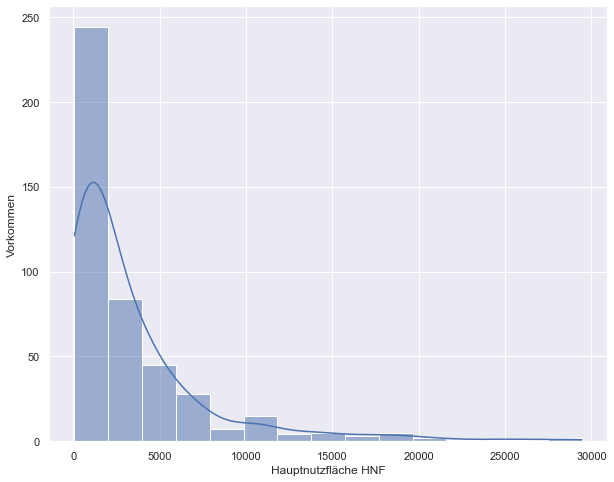

In [9]:
gf = sns.histplot(
    data=df,
    x=c.FIELD_AREA_MAIN_USAGE,
    # hue=im.FIELD_USAGE_CLUSTER,
    bins=15,
    kde='true'
)

gf.set(xlabel='Hauptnutzfläche HNF', ylabel='Vorkommen')

### Stockwerke
Zeigt die Verteilung unterschiedlicher Anzahl **Stockwerke**<br>
Aufteilung nach Cluster möglich.
<br>

[Text(0.5, 0, 'Anzahl Stockwerke'), Text(0, 0.5, 'Vorkommen')]

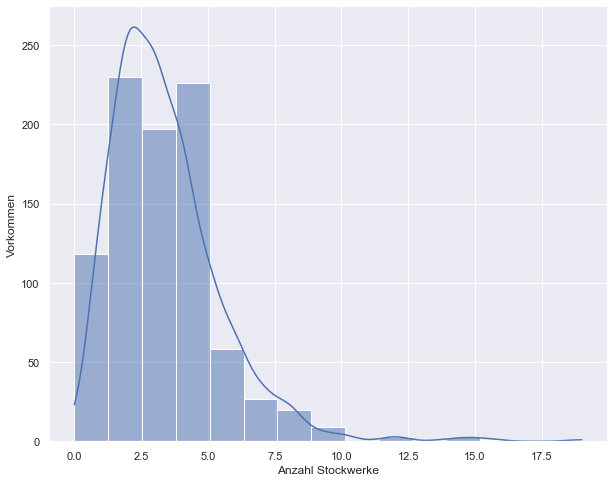

In [10]:
gf = sns.histplot(
    data=df,
    x=c.FIELD_NUM_FLOORS_OVERGROUND,
    # hue=im.FIELD_USAGE_CLUSTER,
    bins=15,
    kde='true'
)

gf.set(xlabel='Anzahl Stockwerke', ylabel='Vorkommen')

### Nutzungstypen
Zeigt die Verteilung unterschiedlicher **Nutzungstypen**<br>
Aufteilung nach Cluster möglich.
<br>

ConversionError: Failed to convert value(s) to axis units: 5          SCHULEN
6           WOHNEN
8           WOHNEN
9       GESUNDHEIT
11          WOHNEN
           ...    
3021    GESUNDHEIT
3284    GESUNDHEIT
3285           NaN
3341        WOHNEN
3342        WOHNEN
Name: x, Length: 952, dtype: object

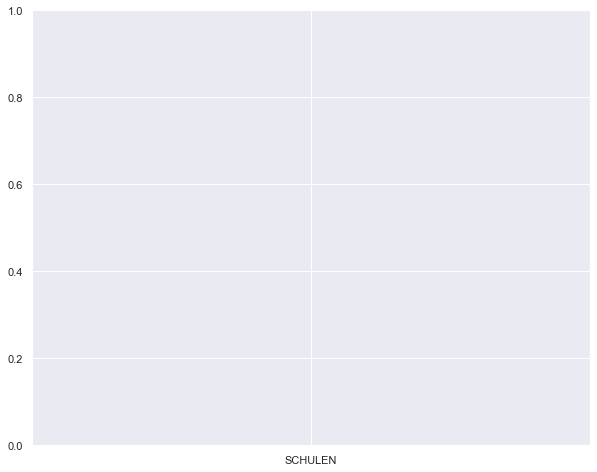

In [11]:
gf = sns.histplot(
    data=df,
    x=c.FIELD_USAGE_CLUSTER,
    # hue=im.FIELD_USAGE_CLUSTER,
    bins=15,
)

gf.set(xlabel='Nutzungstyp (Cluster))', ylabel='Vorkommen')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

None  #don't show the label objects

### Lift
Zeigt Korrelation gruppiert nach Attribut **Lift vorhanden** auf.
<br>

In [ ]:
gf = sns.lineplot(
    data=df,
    x=c.FIELD_AREA_MAIN_USAGE,
    y=c.FIELD_AREA_TOTAL_FLOOR_416,
    # hue=im.FIELD_NUM_BUILDINGS
    hue=c.FIELD_ELEVATOR_PRESENT
)

gf.set_xlim(0, 11000)
gf.set(xlabel='Hauptnutzfläche HNF', ylabel='Geschossfläche GF')
plt.legend(title='Elevators', loc='upper left', labels=['No Elevator', 'Elevator present'])
